# Import OpenVisus library and custom xarray backend

In [13]:
from OpenVisus import *
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc
from backend_v2 import *
resolution=18

## Load the netcdf file

In [14]:
d=xr.open_dataset('nasa_cmip6.nc',engine=OpenVisusBackendEntrypoint,drop_variables=['height','time_bounds'])
d

None
Adding field  tas shape  [5479, 360, 720, 20] dtype  float32 labels  ['time', 'lat', 'lon', 'resolution'] Max Resolution  19


<xarray.Dataset>
Dimensions:  (time: 5479, lat: 360, lon: 720, resolution: 20)
Coordinates:
  * lat      (lat) float64 -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Dimensions without coordinates: time, resolution
Data variables:
    tas      (time, lat, lon, resolution) float32 ...
Attributes: (12/53)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2019-08-17T11:05:59Z
    description:            CMIP6 historical
    title:                  CNRM-CM6-1-HR model output prepared for CMIP6 and...
    activity_id:            CMIP
    contact:                contact.cmip@meteo.fr
    ...                     ...
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     84a9e3f161dade7_8250e198106a168
    arpege_minor_version:   6.3.3
    history:                none
    tracking_id:            hdl:21.14100/27c212f1-8891-4d79-815d-0eba4967f11c
    idx_url:                http://atlantis.sci.utah.edu/mod_visus?dataset=cm...

## Select the timestep, resolution, field

we are using lazyloading in the backend, meaning that we are not directly loading the data into the memory. So, if we want to access the values, either we load the data using .load() or just try accessing it like dset.${VARIABLE_NAME}.values before performing any actions like plotting or other computations.

In [15]:
ds=d.isel(time=0,resolution=resolution)
ds.tas.load() 

_raw_indexing_method key (0, slice(None, None, None), slice(None, None, None), 18)


<xarray.DataArray 'tas' (lat: 180, lon: 720)>
array([[256.91367, 256.91367, 256.91367, ..., 256.91367, 256.91367,
        256.91367],
       [257.8396 , 257.8396 , 257.8396 , ..., 257.8396 , 257.8396 ,
        257.8396 ],
       [259.4636 , 259.4636 , 259.4636 , ..., 259.4636 , 259.4636 ,
        259.4636 ],
       ...,
       [254.1021 , 254.1021 , 254.1021 , ..., 254.1021 , 254.1021 ,
        254.1021 ],
       [253.52802, 253.52802, 253.52802, ..., 253.52802, 253.52802,
        253.52802],
       [252.60666, 252.60666, 252.60666, ..., 252.60666, 252.60666,
        252.60666]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.62 -89.12 -88.62 -88.13 ... 88.62 89.12 89.62
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

## Reset the coordinates for low resolution data

Again, when we are using the lazyloading, we initially use the full coordinates values. If we are using the lower resolution, we need to fix the coordinates to match the data variables size. This is also handled by the backend.

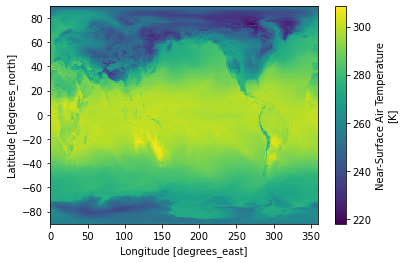

In [16]:
dset=reset_coordinates(ds)
dset.tas.plot()